### Import Libraries

In [1]:
import pandas as pd
import warnings
import logging
import math
import random
import os
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.svm import SVC
import multiprocessing as mp
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from IPython.display import display
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from imblearn.over_sampling import SMOTE
##from pgmpy.models import BayesianNetwork
from sklearn.ensemble import IsolationForest
#from pgmpy.inference import VariableElimination
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import silhouette_score, confusion_matrix, classification_report
#from pgmpy.estimators import MaximumLikelihoodEstimator, HillClimbSearch, BicScore
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier

logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

### Load Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

base_x = pd.read_csv('/content/drive/MyDrive/dataset/Base.csv')
base_x.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [4]:
base = base_x.sample(frac=0.1, random_state=1)

In [5]:
base.info

<bound method DataFrame.info of         fraud_bool  income  name_email_similarity  prev_address_months_count  \
276826           0     0.1               0.771248                         -1   
849425           0     0.9               0.868609                         -1   
504499           0     0.6               0.461974                         30   
601054           0     0.9               0.388111                         31   
980221           0     0.9               0.512189                         -1   
...            ...     ...                    ...                        ...   
137070           0     0.8               0.493928                         -1   
179623           0     0.1               0.923013                         -1   
50092            0     0.9               0.897986                         -1   
160777           0     0.6               0.337268                         -1   
295097           0     0.6               0.993665                         47   

        current_address_months_count  customer_age  days_since_request  \
276826                           192            20            0.008449   
849425                             8            30            0.003503   
504499                             8            30            0.006326   
601054                             2            50            0.010480   
980221                           249            50            0.013239   
...                              ...           ...                 ...   
137070                            38            30            0.042895   
179623                            83            20            0.019892   
50092                             28            30            0.008598   
160777                           143            30            3.413241   
295097                           369            50            0.006922   

        intended_balcon_amount payment_type  zip_count_4w  ...  \
276826               -1.050951           AB          2570  ...   
849425               -0.683337           AB          1081  ...   
504499               -0.916832           AB          2162  ...   
601054               -0.817218           AB          2676  ...   
980221               -0.230889           AB           621  ...   
...                        ...          ...           ...  ...   
137070               -1.734934           AC          1119  ...   
179623               -0.567210           AC          3170  ...   
50092                -1.534745           AD           931  ...   
160777               -0.922612           AC          3379  ...   
295097               -0.768147           AB          2351  ...   

        has_other_cards  proposed_credit_limit  foreign_request    source  \
276826                0                 1500.0                0  INTERNET   
849425                1                  200.0                0  INTERNET   
504499                0                  500.0                0  INTERNET   
601054                1                 1500.0                0  INTERNET   
980221                1                  500.0                0  INTERNET   
...                 ...                    ...              ...       ...   
137070                0                 1500.0                0  INTERNET   
179623                0                  200.0                0  INTERNET   
50092                 0                  200.0                0  INTERNET   
160777                1                  200.0                0  INTERNET   
295097                1                  200.0                0  INTERNET   

        session_length_in_minutes device_os  keep_alive_session  \
276826                  37.831889   windows                   0   
849425                   1.610226     linux                   1   
504499                   5.502750     linux                   0   
601054                   3.209488   windows                   1   
980221                   8.416212     other                   1  

In [6]:
display(base['fraud_bool'].value_counts())
fraud = base[base['fraud_bool']==1]
legit = base[base['fraud_bool']==0]
# fraction of fraud data against legit
outlier_fraction = len(fraud)/float(len(legit))
print(f'\nFraction of fraudulant accounts: {outlier_fraction}')
print('Fraud Cases: {}'.format(len(fraud)))
print('Legitimate Cases: {}'.format(len(legit)))

,count
fraud_bool,
0,98861
1,1139



Fraction of fraudulant accounts: 0.01152122677294383
Fraud Cases: 1139
Legitimate Cases: 98861


In [7]:
base['housing_status'].value_counts()

,count
housing_status,
BC,37159
BB,26138
BA,16999
BE,16912
BD,2608
BF,153
BG,31


In [8]:
feature_descriptions = {
    'income' : "Annual income of the applicant (in decile form). Ranges between [0.1, 0.9].",
    'name_email_similarity' : "Metric of similarity between email and applicant’s name. Higher values represent higher similarity. Ranges between [0, 1].",
    'prev_address_months_count' : "Number of months in previous registered address of the applicant, i.e. the applicant’s previous residence, if applicable. Ranges between [−1, 380] months (-1 is a missing value).",
    'current_address_months_count' : "Months in currently registered address of the applicant. Ranges between [−1, 429] months (-1 is a missing value).",
    'customer_age' : "Applicant’s age in years, rounded to the decade. Ranges between [10, 90] years.",
    'days_since_request' : "Number of days passed since application was done. Ranges between [0, 79] days.",
    'intended_balcon_amount' : "Initial transferred amount for application. Ranges between [−16, 114] (negatives are missing values).",
    'payment_type': "Credit payment plan type. 5 possible (annonymized) values.",
    'zip_count_4w' : "Number of applications within same zip code in last 4 weeks. Ranges between [1, 6830].",
    'velocity_6h' : "Velocity of total applications made in last 6 hours i.e., average number of applications per hour in the last 6 hours. Ranges between [−175, 16818].",
    'velocity_24h' : "Velocity of total applications made in last 24 hours i.e., average number of applications per hour in the last 24 hours. Ranges between [1297, 9586].",
    'velocity_4w' : "Velocity of total applications made in last 4 weeks, i.e., average number of applications per hour in the last 4 weeks. Ranges between [2825, 7020].",
    'bank_branch_count_8w' : "Number of total applications in the selected bank branch in last 8 weeks. Ranges between [0, 2404].",
    'date_of_birth_distinct_emails_4w' : "Number of emails for applicants with same date of birth in last 4 weeks. Ranges between [0, 39].",
    'employment_status' : "Employment status of the applicant. 7 possible (annonymized) values.",
    'credit_risk_score' : "Internal score of application risk. Ranges between [−191, 389].",
    'email_is_free' : "Domain of application email (either free or paid).",
    'housing_status' : "Current residential status for applicant. 7 possible (annonymized) values.",
    'phone_home_valid' : "Validity of provided home phone.",
    'phone_mobile_valid' : "Validity of provided mobile phone.",
    'bank_months_count' : "How old is previous account (if held) in months. Ranges between [−1, 32] months (-1 is a missing value).",
    'has_other_cards' : "If applicant has other cards from the same banking company.",
    'proposed_credit_limit' : "Applicant’s proposed credit limit. Ranges between [200, 2000].",
    'foreign_request' : "If origin country of request is different from bank’s country.",
    'source' : "Online source of application. Either browser (INTERNET) or app (TELEAPP).",
    'session_length_in_minutes' : "Length of user session in banking website in minutes. Ranges between [−1, 107] minutes (-1 is a missing value).",
    'device_os' : "Operative system of device that made request. Possible values are: Windows, macOS, Linux, X11, or other.",
    'keep_alive_session' : "User option on session logout.",
    'device_distinct_emails_8w' : "Number of distinct emails in banking website from the used device in last 8 weeks. Ranges between [−1, 2] emails (-1 is a missing value).",
    'device_fraud_count' : "Number of fraudulent applications with used device. Ranges between [0, 1].",
    'month' : "Month where the application was made. Ranges between [0, 7].",
    'fraud_bool' : "If the application is fraudulent or not.1 indiates fraud and0 indicates legit"
}

In [9]:
# split numerical and categorical features
num_features = base.select_dtypes(include='number').columns.tolist()

thresh = 25

cont_feats = [feat for feat in num_features if base[feat].nunique() >= thresh]
disc_feats = [feat for feat in num_features if base[feat].nunique() < thresh]

cat_feats = base.select_dtypes(exclude='number').columns.tolist()
target_feat = disc_feats[0]
disc_feats.remove(target_feat)

cont_feats.append(disc_feats[0])
disc_feats.remove(disc_feats[0])

print(f'Features: {base.shape[1]}\n\n\
Num features: {len(num_features)}\n\
{num_features}\n\n\
Continuous: {len(cont_feats)}\n\
{cont_feats}\n\n\
Discrete: {len(disc_feats)}\n\
{disc_feats}\n\n\
Categorical: {len(cat_feats)}\n\
{cat_feats}')

print(f'\n\nTarget feature: {target_feat}')

Features: 32

Num features: 27
['fraud_bool', 'income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'bank_months_count', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes', 'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count', 'month']

Continuous: 15
['name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'session_length_in_minutes', 'income']

Discrete: 11
['customer_age', 'email_is_fr

### Data Cleaning and Preparation

In [10]:
# Encoding Categorical Variables
def encode_columns(df, categorical):
    df_encoded = df.copy()  # Create a copy of the DataFrame to work on
    le = LabelEncoder()
    for col in categorical:
        df_encoded[col] = le.fit_transform(df_encoded[col])  # Convert to string to handle any type of data
    return df_encoded

# Encode the categorical and target columns
base_encoded = encode_columns(base, cat_feats)

In [11]:
base_encoded['fraud_bool'].value_counts()

,count
fraud_bool,
0,98861
1,1139


In [12]:
base_clean = base_encoded[~base_encoded.isin([-1]).any(axis=1)]
base_clean.shape

(19596, 32)

In [13]:
base_clean = base_clean.replace([np.inf, -np.inf], np.nan).dropna()
base_clean.shape

(19596, 32)

In [14]:
base_clean['fraud_bool'].value_counts()

,count
fraud_bool,
0,19540
1,56


In [15]:
# split dataset into train and test
X = base_clean.drop(target_feat, axis=1)
y = base_clean[target_feat]

train_input, test_input, train_output, test_output = train_test_split(X, y , test_size = 0.2)
print(train_input.shape)
print(test_input.shape)
print(train_output.shape)
print(test_output.shape)

(15676, 31)
(3920, 31)
(15676,)
(3920,)


## Exploratory Data Analysis

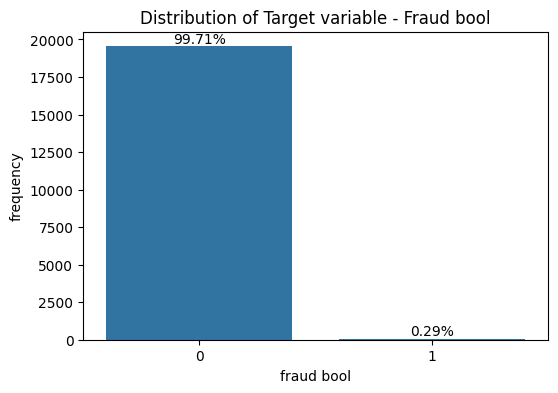

In [16]:
fig = plt.figure(figsize=(6,4))

# plot frequency of dependent variable
total_cnt = len(base_clean)
ax = sns.countplot(x='fraud_bool', data=base_clean)

for p in ax.patches:
    ax.annotate(f'{(p.get_height()/total_cnt)*100:.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0,0), textcoords='offset points')

# Add titles and labels
ax.set_title('Distribution of Target variable - Fraud bool')
ax.set_xlabel('fraud bool')
ax.set_ylabel('frequency')

# Show the plot
plt.show();


In [17]:
def eda_cont_stats(feat, base):
    feature_stats = []

    for col in feat:
        missing_values = len(base[base[col] == -1])
        mean = base[col].mean()
        std = base[col].std()
        minimum = base[col].min()
        maximum = base[col].max()
        median = base[col].median()
        correlation = base_encoded.corr()['fraud_bool'][col]

        feature_stats.append({
            'Feature': col,
            'Missing Values': missing_values,
            'Mean': mean,
            'Standard Deviation': std,
            'Minimum': minimum,
            'Maximum': maximum,
            'Median': median,
            'Correlation': correlation
        })

    return feature_stats

# Create a DataFrame from the list of dictionaries
feature_stats = eda_cont_stats(cont_feats, base_clean)
base_stats = pd.DataFrame(feature_stats)


In [18]:
base_stats

,Feature,Missing Values,Mean,Standard Deviation,Minimum,Maximum,Median,Correlation
0,name_email_similarity,0,0.472692,0.289659,0.000159,0.999999,0.458088,-0.034323
1,prev_address_months_count,0,59.137630,62.293289,6.000000,371.000000,33.000000,-0.028807
2,current_address_months_count,0,22.620127,44.951508,0.000000,416.000000,10.000000,0.032112
3,days_since_request,0,1.392590,5.991628,0.000003,76.296635,0.014919,0.007688
4,intended_balcon_amount,0,11.348021,22.182242,-10.410875,111.396564,-0.783374,-0.024422
5,zip_count_4w,0,1486.568636,990.409043,3.000000,6314.000000,1225.000000,0.011383
6,velocity_6h,0,5717.876695,3076.814793,-106.978297,16356.364000,5522.388940,-0.018423
7,velocity_24h,0,4851.823572,1490.711472,1423.654460,9409.114804,4874.910799,-0.007897
8,velocity_4w,0,4899.623513,944.897121,2989.524700,6988.564717,4962.976121,-0.013456
9,bank_branch_count_8w,0,187.105787,444.909503,0.000000,2287.000000,13.000000,-0.014060


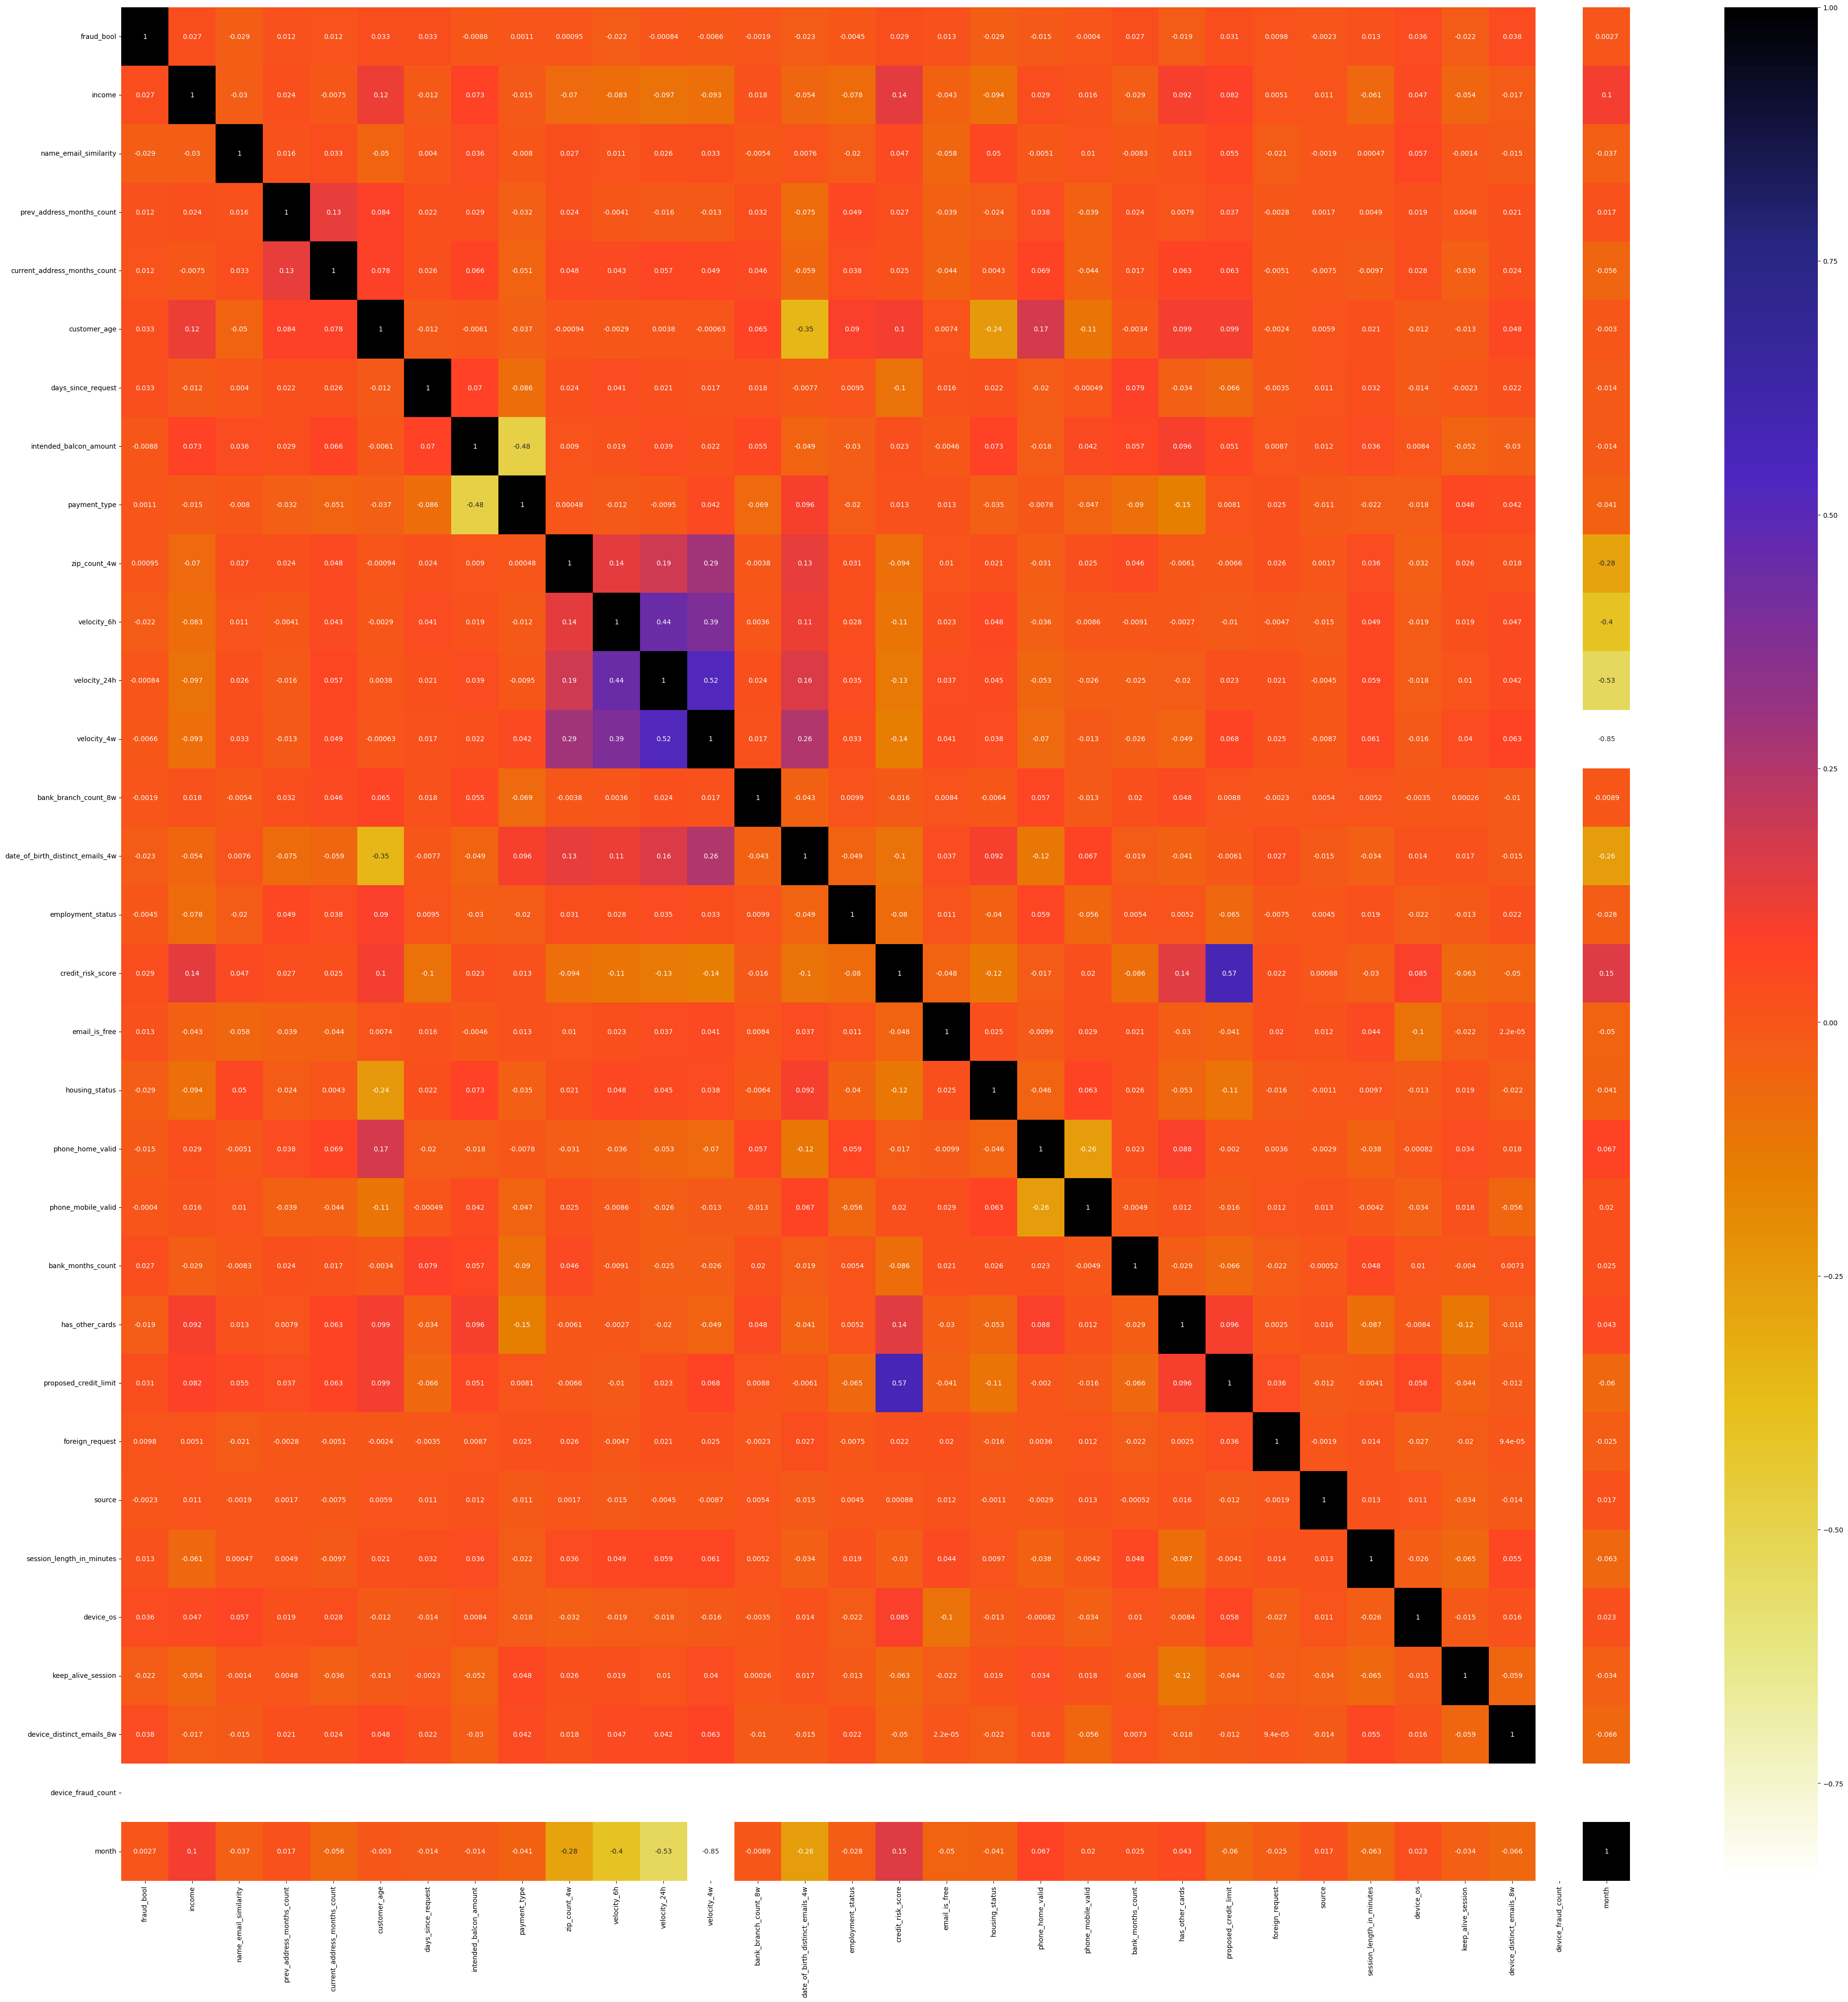

In [19]:
plt.figure(figsize=(50,50))
cor = base_clean.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [20]:
base[['month','velocity_4w']]

,month,velocity_4w
276826,2,5339.732229
849425,6,3582.755084
504499,3,4936.787227
601054,4,4872.355833
980221,7,3150.353836
...,...,...
137070,1,4276.054477
179623,1,5351.253490
50092,0,5961.061487
160777,1,5625.951184


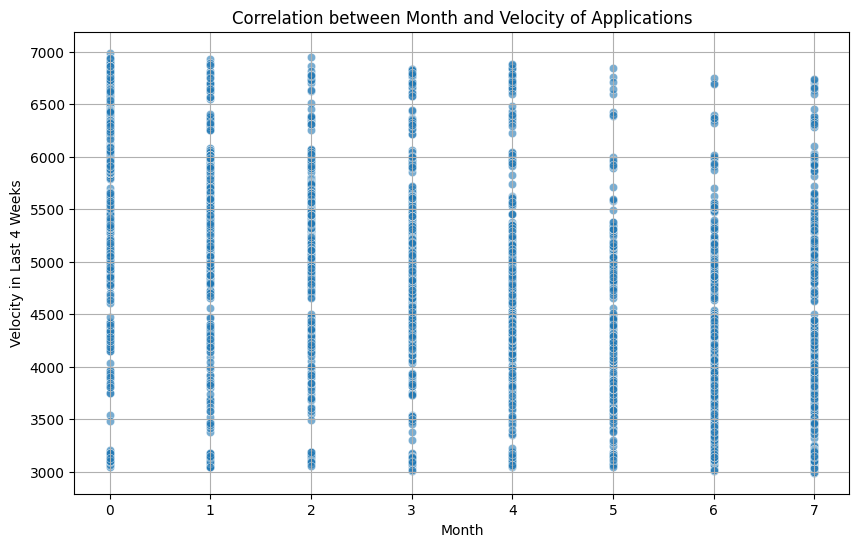

In [21]:
# Plotting the data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=base_clean, x='month', y='velocity_4w', legend=False, alpha=0.6)

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Velocity in Last 4 Weeks')
plt.title('Correlation between Month and Velocity of Applications')
plt.grid(True)
plt.show()

In [22]:
# method to find high correlated and redundant features
def correlation(df, threshold):
  col_corr = set()
  corr_matrix = df.corr()
  print(range(len(corr_matrix.columns)))
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i, j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
        #print(f'{colname}~{corr_matrix.iloc[i, j]}')
  return col_corr


In [23]:
corr_features = correlation(base_clean, 0.5)
print(corr_features)

range(0, 32)
{'proposed_credit_limit', 'month', 'velocity_4w'}




1.   Proposed credit limit is highly correlated with credit score
2. Month represents the volume of applications that may be depict seasonal trends. This is correlated with the velocity of applications for 6h, 2h or 4w
3. Device fraud count does not have any influence on any features as all the samples have the value 0





In [24]:
base_clean['month'].value_counts()

,count
month,
3,3675
0,3041
2,2877
4,2402
7,2221
1,1962
6,1882
5,1536


In [25]:
def plot_correlation(features):
  warnings.filterwarnings('ignore')
  plt.figure(figsize=(18, 6))
  feat1, feat2 = features
  print(f'{feat1}~{feat2}')
  sns.barplot(x=feat1, y=feat2, data=base, palette='viridis',orient='h')
  plt.xlabel(f'{feat1}')
  plt.ylabel(f'{feat2}')
  plt.title(f'Bar Plot of {feat1} vs. {feat2}')


In [26]:
#plot_correlation({'month','velocity_24h'})

In [27]:
#plot_correlation({'month','velocity_6h'})

In [28]:
p#lot_correlation({'proposed_credit_limit','credit_risk_score'})

In [29]:
def plot_correlation_scatter(features):

    feat1, feat2 = features
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feat1, y=feat2, data=base_encoded, alpha=0.5)
    plt.xlabel(feat1)
    plt.ylabel(feat2)
    plt.title(f'Scatter Plot of {feat1} vs. {feat2}')
    plt.show()



In [30]:
#plot_correlation({'velocity_24h','month'})

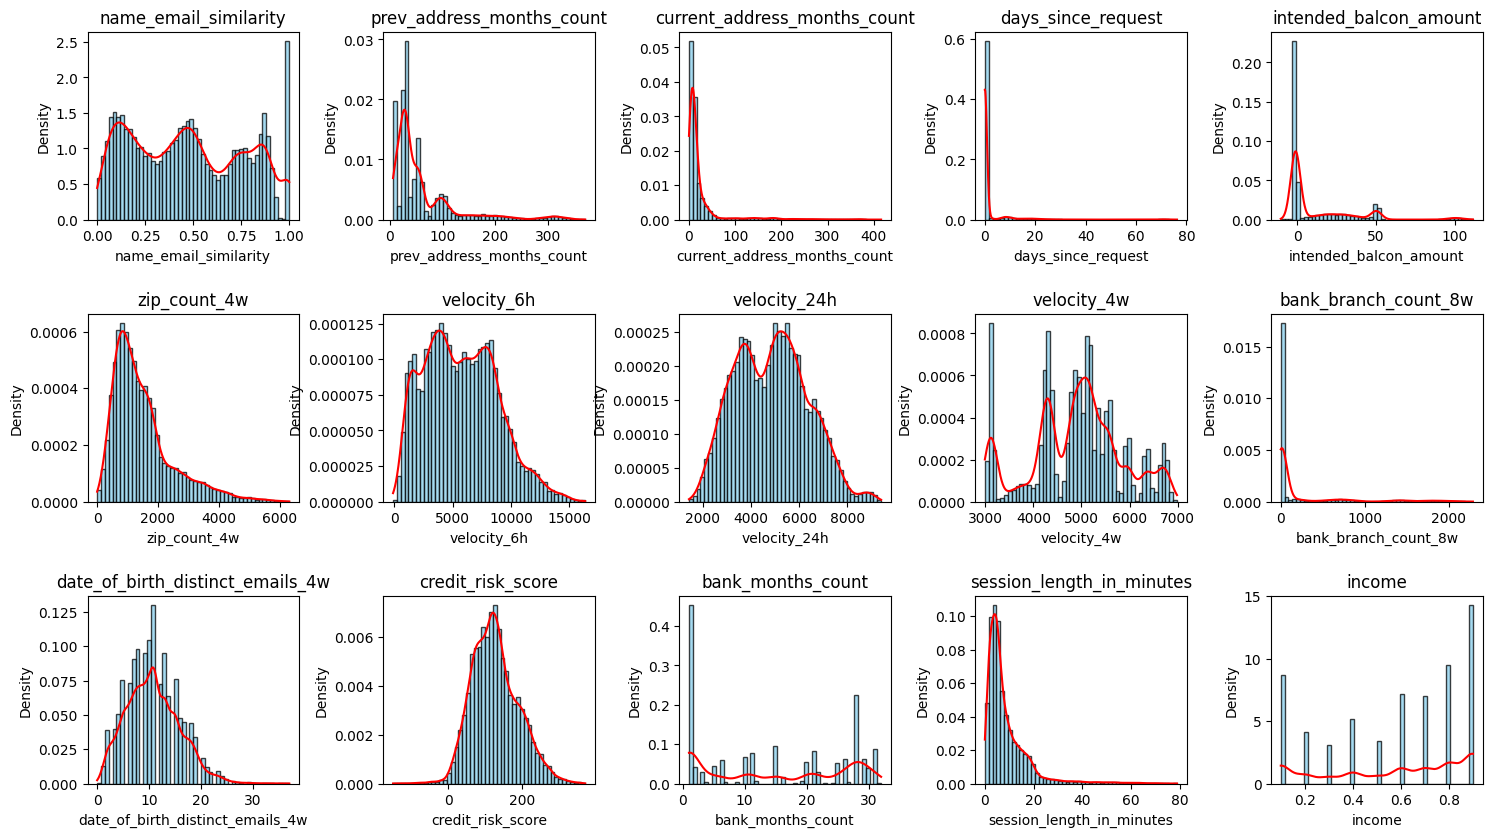

In [31]:
# create histogram with KDE plot for all teh numerical features
fig, ax = plt.subplots(3, 5, figsize=(18, 8))
plt.subplots_adjust(top = 0.99, bottom=0.05, hspace=0.5, wspace=0.4)
ax = ax.flatten()
for i,col in enumerate(cont_feats):
    # Check if the column is numeric before applying KDE
    if base_clean[col].dtype in [np.int64, np.float64]:
        kde = stats.gaussian_kde(base_clean[col])
        x = np.linspace(base_clean[col].min(), base_clean[col].max(), 1000)
        ax[i].plot(x, kde(x), color='red')
        ax[i].hist(base_clean[col], bins=50, density=True, alpha=0.75, color='skyblue', edgecolor='black')
        ax[i].set_title(f'{col}')
        ax[i].set_xlabel(col)
        ax[i].set_ylabel('Density')
    else:
        print(f"Skipping non-numeric column: {col}") # Inform the user about skipped columns

In [32]:
def normalizeDistributions(feats):
  fig, ax = plt.subplots(3, 5, figsize=(18, 8))
  plt.subplots_adjust(top = 0.99, bottom=0.05, hspace=0.5, wspace=0.4)
  ax = ax.flatten()
  for i,col in enumerate(feats):
      # Check if the column is numeric before applying KDE
      if base_clean[col].dtype in [np.int64, np.float64]:
        # Normalize the column, handling potential issues
          x_col = base_clean[col].copy() # Create a copy to avoid modifying the original
          # Check for negative skewness
          if x_col.skew() < 0:
              x_col = np.log1p(x_col)
          # Check for positive skewness
          elif x_col.skew() > 0:
              x_col = np.sqrt(x_col)

          x_col = np.nan_to_num(x_col)

          kde = stats.gaussian_kde(x_col)
          x = np.linspace(x_col.min(), x_col.max(), 1000)
          ax[i].plot(x, kde(x), color='red')
          ax[i].hist(x_col, bins=50, density=True, alpha=0.75, color='skyblue', edgecolor='black')
          ax[i].set_title(f'{col}')
          ax[i].set_xlabel(col)
          ax[i].set_ylabel('Density')
          base_clean[col] = x_col
      else:
          print(f"Skipping non-numeric column: {col}") # Inform the user about skipped columns

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


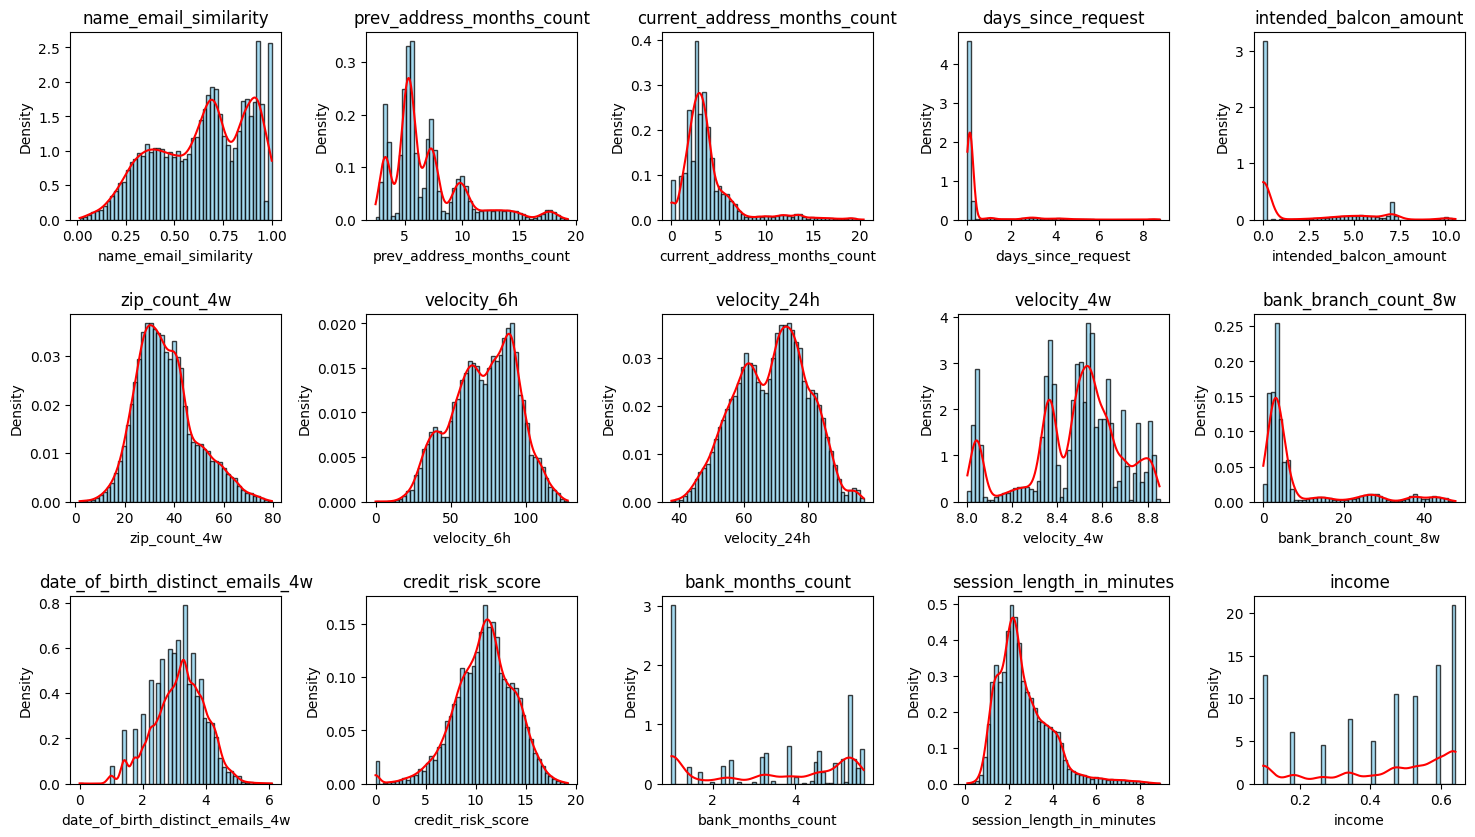

In [33]:
normalizeDistributions(cont_feats)

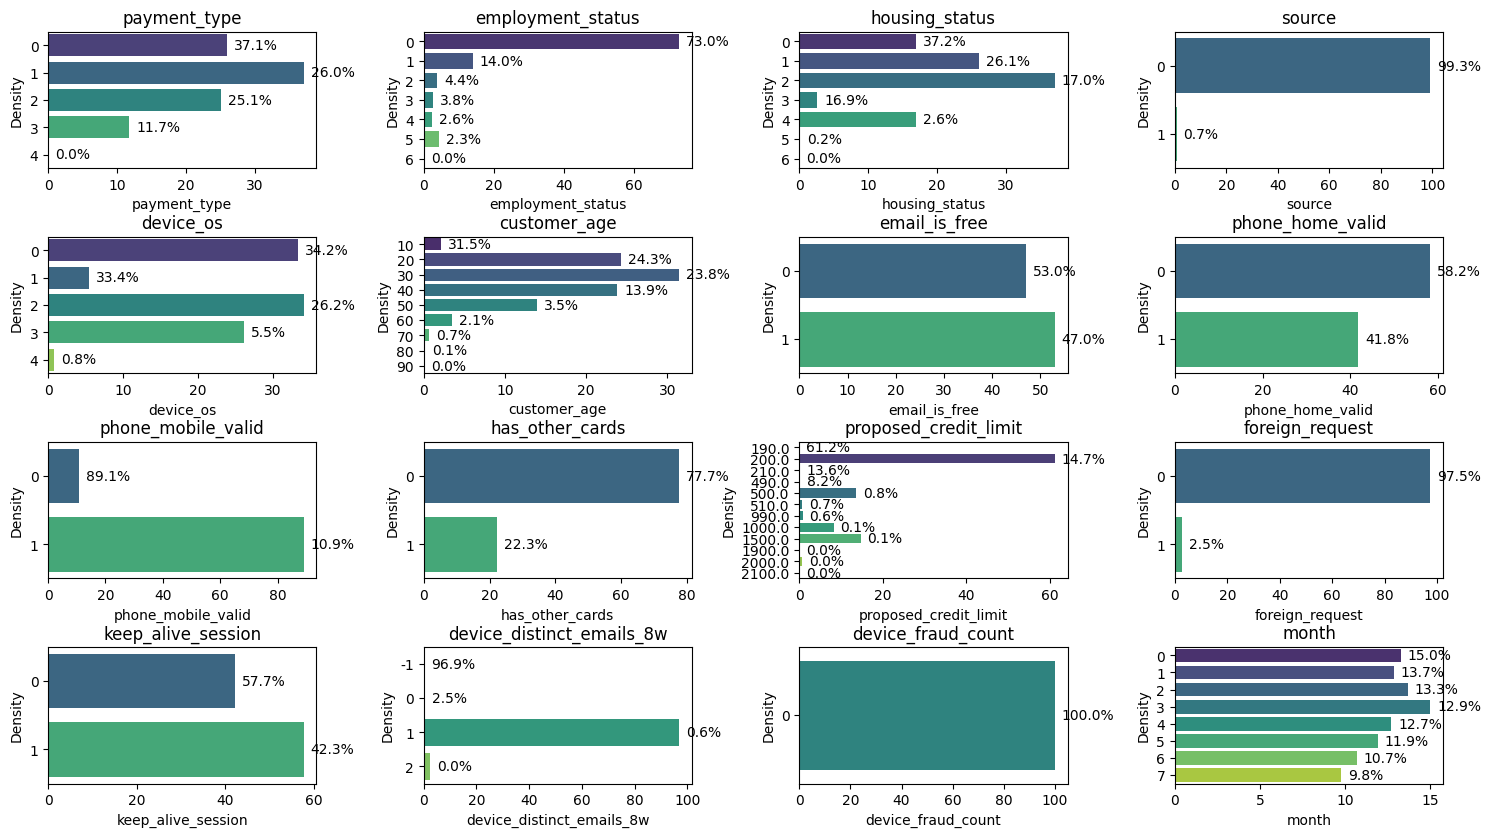

In [34]:
# create histogram with KDE plot for all teh numerical features
def eda_cat_feats(feats):
  warnings.filterwarnings('ignore')
  fig, ax = plt.subplots(4, 4, figsize=(18, 8))
  plt.subplots_adjust(top = 0.99, bottom=0.05, hspace=0.5, wspace=0.4)
  ax = ax.flatten()
  for i,col in enumerate(feats):

      # Plotting horizontal bar plots on the first axis
      value_counts = base_encoded[col].value_counts()
      percent_total = value_counts / sum(value_counts) * 100
      bars = sns.barplot(x=percent_total.values, y=percent_total.index, ax=ax[i], palette='viridis', orient='h')

      # Annotating the bars with percentage values
      for bar, perc in zip(bars.patches, percent_total.values):
          ax[i].annotate(f'{perc:.1f}%',
                        xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                        xytext=(5, 0),  # 5 points horizontal offset
                        textcoords='offset points',
                        ha='left', va='center')

      ax[i].set_title(f'{col}')
      ax[i].set_xlabel(col)
      ax[i].set_ylabel('Density')

eda_cat_feats (cat_feats+disc_feats)

## Feature Engineering

In [35]:
base_clean['fraud_bool'].value_counts()

,count
fraud_bool,
0,19540
1,56


In [36]:
X = base_clean.drop(target_feat, axis=1)
y = base_clean[target_feat]

# Calculate the number of fraud accounts after oversampling
n_legit = len(base_clean[base_clean['fraud_bool']==0])
n_fraud = 0.80 * n_legit

# Using SMOTE to oversample fraud accounts
smote = SMOTE(sampling_strategy={1: int(n_fraud)})
X_smote, y_smote = smote.fit_resample(X, y)

# Combine the resampled features and labels into a new DataFrame
base_smote = pd.concat([X_smote, y_smote], axis=1)
print(f'Shape of the resampled data: {base_smote.shape}')
print(base_smote['fraud_bool'].value_counts())

Shape of the resampled data: (35172, 32)
fraud_bool
0    19540
1    15632
Name: count, dtype: int64


In [37]:
# drop high correlation and redundant features
# {'date_of_birth_distinct_emails_4w', 'velocity_24h', 'month', 'proposed_credit_limit', 'housing_status', 'velocity_4w', 'payment_type'}

drop_columns = ['month', 'velocity_4w', 'proposed_credit_limit']

for col in drop_columns:
    base_smote.drop(col, axis=1, inplace=True)
base_smote.head()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,...,bank_months_count,has_other_cards,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,fraud_bool
0,0.470004,0.679687,5.477226,2.828427,30,0.079539,0.000000,1,46.497312,33.287770,...,1.000000,0,0,0,2.345794,0,0,1,0,0
1,0.641854,0.622986,5.567764,1.414214,50,0.102373,0.000000,1,51.730069,62.046158,...,4.358899,1,0,0,1.791504,3,1,1,0,0
2,0.262364,0.351304,3.000000,7.483315,40,0.176755,0.000000,1,26.229754,86.625239,...,4.472136,0,0,0,0.881596,3,1,1,0,0
3,0.182322,0.262998,4.582576,6.244998,30,0.029682,3.327913,0,33.105891,63.658283,...,2.236068,0,0,0,4.193960,3,1,1,0,0
4,0.095310,0.932374,4.898979,4.000000,20,0.099606,6.404552,1,37.322915,39.831778,...,3.872983,0,0,0,2.780591,2,0,1,0,0


In [38]:
# split dataset into train and test
X = base_smote.drop(target_feat, axis=1)
y = base_smote[target_feat]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y , test_size = 0.2)
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(28137, 28)
(7035, 28)
(28137,)
(7035,)


## Classification Algorithms

### Clustering

#### *KMeans clustering with base data*

Training Silhouette Score: 0.35664126330610657
Test Silhouette Score: 0.36403834552255626
Train accuracy score: 0.5340648124521562
Training Confusion Matrix:
[[8347 7286]
 [  18   25]]

Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.53      0.70     15633
           1       0.00      0.58      0.01        43

    accuracy                           0.53     15676
   macro avg       0.50      0.56      0.35     15676
weighted avg       1.00      0.53      0.69     15676

Test accuracy score: 0.5275510204081633
Test Confusion Matrix:
[[2062 1845]
 [   7    6]]

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.53      0.69      3907
           1       0.00      0.46      0.01        13

    accuracy                           0.53      3920
   macro avg       0.50      0.49      0.35      3920
weighted avg       0.99      0.53      0.69      3920



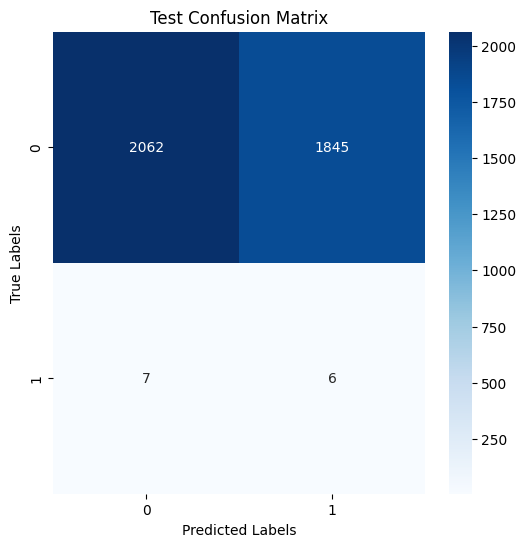

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_input)
X_test_scaled = scaler.transform(test_input)

# Apply PCA for dimensionality reduction (for visualization purposes)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters_train = kmeans.fit_predict(X_train_pca)
clusters_test = kmeans.predict(X_test_pca)

# Evaluate clustering performance on training data
sil_score_train = silhouette_score(X_train_pca, clusters_train)
print(f'Training Silhouette Score: {sil_score_train}')

# Evaluate clustering performance on test data
sil_score_test = silhouette_score(X_test_pca, clusters_test)
print(f'Test Silhouette Score: {sil_score_test}')

# Map clusters to the actual labels (this might need adjustment)
# Assuming cluster 0 is legitimate and cluster 1 is fraud
labels_train = np.zeros_like(clusters_train)
labels_train[clusters_train == 1] = 1

labels_test = np.zeros_like(clusters_test)
labels_test[clusters_test == 1] = 1

# Evaluate with confusion matrix and classification report on training data
cm_train = confusion_matrix(train_output, labels_train)
cr_train = classification_report(train_output, labels_train)
accuracy_train = accuracy_score(train_output, labels_train)


print(f'Train accuracy score: {accuracy_train}')
print('Training Confusion Matrix:')
print(cm_train)
print('\nTraining Classification Report:')
print(cr_train)

# Evaluate with confusion matrix and classification report on test data
cm_test = confusion_matrix(test_output, labels_test)
cr_test = classification_report(test_output, labels_test)
accuracy_test = accuracy_score(test_output, labels_test)

print(f'Test accuracy score: {accuracy_test}')
print('Test Confusion Matrix:')
print(cm_test)
print('\nTest Classification Report:')
print(cr_test)

# Plot confusion matrix for test data
plt.figure(figsize=(6, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


#### *KMeans clsutering with Feature engineered data*

Training Silhouette Score: 0.35672885738532567
Test Silhouette Score: 0.35616997195117905
Train accuracy score: 0.7768063404058713
Training Confusion Matrix:
[[12676  2970]
 [ 3310  9181]]

Training Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80     15646
           1       0.76      0.74      0.75     12491

    accuracy                           0.78     28137
   macro avg       0.77      0.77      0.77     28137
weighted avg       0.78      0.78      0.78     28137

Test accuracy score: 0.7697228144989339
Test Confusion Matrix:
[[3107  787]
 [ 833 2308]]

Test Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      3894
           1       0.75      0.73      0.74      3141

    accuracy                           0.77      7035
   macro avg       0.77      0.77      0.77      7035
weighted avg       0.77      0.77      0.77      7035



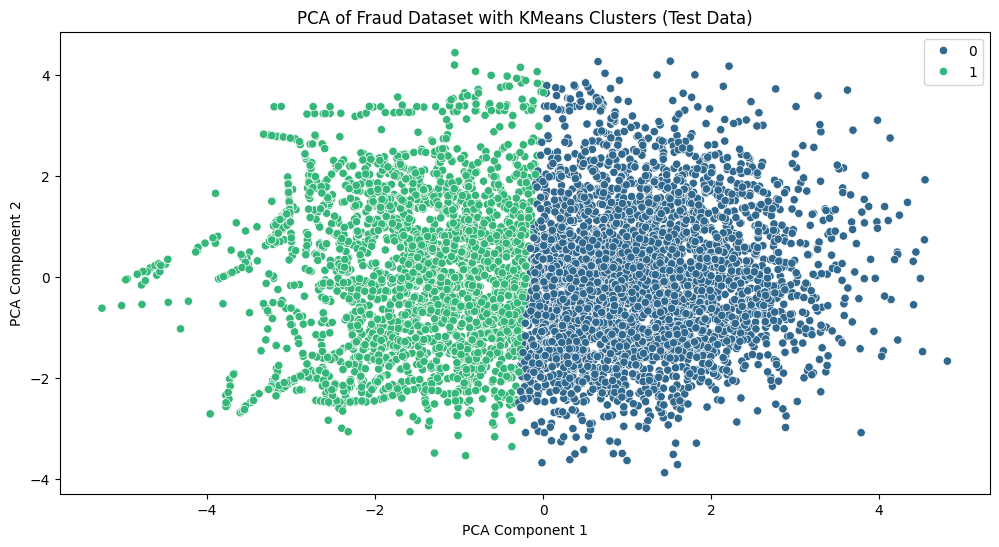

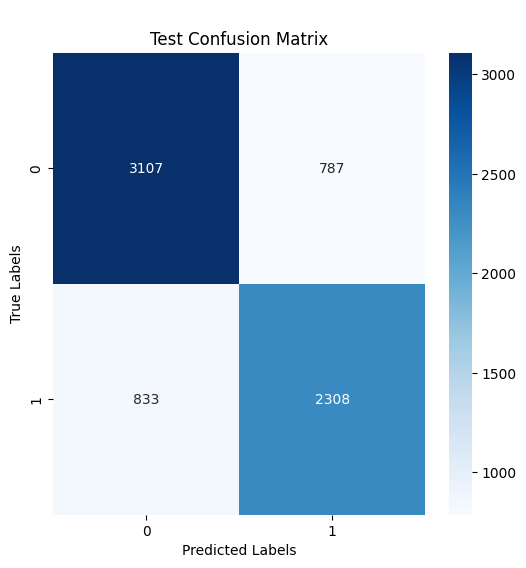

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(Xtrain)
X_test_scaled = scaler.transform(Xtest)

# Apply PCA for dimensionality reduction (for visualization purposes)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters_train = kmeans.fit_predict(X_train_pca)
clusters_test = kmeans.predict(X_test_pca)

# Evaluate clustering performance on training data
sil_score_train = silhouette_score(X_train_pca, clusters_train)
print(f'Training Silhouette Score: {sil_score_train}')

# Evaluate clustering performance on test data
sil_score_test = silhouette_score(X_test_pca, clusters_test)
print(f'Test Silhouette Score: {sil_score_test}')

# Map clusters to the actual labels (this might need adjustment)
# Assuming cluster 0 is legitimate and cluster 1 is fraud
labels_train = np.zeros_like(clusters_train)
labels_train[clusters_train == 1] = 1

labels_test = np.zeros_like(clusters_test)
labels_test[clusters_test == 1] = 1

# Evaluate with confusion matrix and classification report on training data
cm_train = confusion_matrix(ytrain, labels_train)
cr_train = classification_report(ytrain, labels_train)
accuracy_train = accuracy_score(ytrain, labels_train)


print(f'Train accuracy score: {accuracy_train}')
print('Training Confusion Matrix:')
print(cm_train)
print('\nTraining Classification Report:')
print(cr_train)

# Evaluate with confusion matrix and classification report on test data
cm_test = confusion_matrix(ytest, labels_test)
cr_test = classification_report(ytest, labels_test)
accuracy_test = accuracy_score(ytest, labels_test)

print(f'Test accuracy score: {accuracy_test}')

print('Test Confusion Matrix:')
print(cm_test)
print('\nTest Classification Report:')
print(cr_test)



# Plot PCA results with clusters for test data
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=clusters_test, palette='viridis', legend='full')
plt.title('PCA of Fraud Dataset with KMeans Clusters (Test Data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


# Plot confusion matrix for test data
print('\n\n')
plt.figure(figsize=(6, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title('\nTest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


## Anomaly Detection

In [41]:
# Define the parameter grid
param_grid_lof = {
    'n_neighbors': [10, 20, 30],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1,2],
    'contamination': [0.05, 0.1]
}


# Define parameter grid for Isolation Forest
param_grid_if = {
    'n_estimators': [50, 100, 200],
    'max_samples': ['auto', 0.5, 0.75, 1.0],
    'contamination': [0.01, 0.05, 0.1, 0.2],
    'max_features': [1.0, 0.5, 0.75],
    'bootstrap': [False, True]
}

# Define parameter grid for OneClassSVM
param_grid_svm = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'nu': [0.01, 0.05, 0.1, 0.5]
}

# Custom scoring function
def custom_scorer(y_true, y_pred):
    y_pred = np.where(y_pred == 1, 0, 1)
    return accuracy_score(y_true, y_pred)

# Make scorer
scorer = make_scorer(custom_scorer)

# dimensionality reduction
def dim_features(df):
  # Standardize the features
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(df)

  # Apply PCA for dimensionality reduction (for visualization purposes)
  pca = PCA(n_components=2)
  X_pca = pca.fit_transform(X_scaled)
  return X_pca

# method to display evaluation metrics
def displayReport(clf_name, y, y_pred):
    # Adjust y_pred to match binary classification format
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != y).sum()
    print(f"{clf_name}: {n_errors}")
    print("Accuracy Score :")
    print(accuracy_score(y, y_pred))
    print('Classification Report: ')
    print(classification_report(y, y_pred))

### Local Outlier Factor

#### *Local outlier Factor with raw data*

In [42]:
warnings.filterwarnings('ignore')
# Initialize the model
lof = LocalOutlierFactor(novelty=True)
#Reduce the dimensions
train_input = dim_features(train_input)
test_input = dim_features(test_input)
# Perform Grid Search
grid_search = GridSearchCV(estimator=lof, param_grid=param_grid_lof, scoring=scorer, cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(train_input)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
#print(f"Best Score: {best_score}")

# Train the final model with best parameters
best_lof = LocalOutlierFactor(**best_params)
y_pred = best_lof.fit_predict(test_input)
displayReport('Local Outlier', test_output, y_pred)

Best Parameters: {'algorithm': 'auto', 'contamination': 0.05, 'leaf_size': 20, 'metric': 'euclidean', 'n_neighbors': 10, 'p': 1}
Local Outlier: 207
Accuracy Score :
0.9471938775510204
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      3907
           1       0.01      0.08      0.01        13

    accuracy                           0.95      3920
   macro avg       0.50      0.51      0.49      3920
weighted avg       0.99      0.95      0.97      3920



#### #### *Local outlier Factor with raw data*

In [43]:
warnings.filterwarnings('ignore')
# Initialize the model
lof = LocalOutlierFactor(novelty=True)
#Reduce the dimensions
train_input = dim_features(Xtrain)
test_input = dim_features(Xtest)
# Perform Grid Search
grid_search = GridSearchCV(estimator=lof, param_grid=param_grid_lof, scoring=scorer, cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(Xtrain)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

# Train the final model with best parameters
best_lof = LocalOutlierFactor(**best_params)
y_pred = best_lof.fit_predict(Xtest)
displayReport('Local Outlier', ytest, y_pred)

Best Parameters: {'algorithm': 'auto', 'contamination': 0.05, 'leaf_size': 20, 'metric': 'euclidean', 'n_neighbors': 10, 'p': 1}
Best Score: nan
Local Outlier: 3401
Accuracy Score :
0.5165600568585643
Classification Report: 
              precision    recall  f1-score   support

           0       0.54      0.92      0.68      3894
           1       0.13      0.01      0.03      3141

    accuracy                           0.52      7035
   macro avg       0.33      0.47      0.35      7035
weighted avg       0.36      0.52      0.39      7035



### Isolation Forest

In [44]:
# Initialize the model
clf_if = IsolationForest(random_state=42, verbose=0)

#Reduce the dimensions
train_input = dim_features(train_input)
test_input = dim_features(test_input)

grid_search_if = GridSearchCV(estimator=clf_if, param_grid=param_grid_if, scoring=scorer, cv=5, n_jobs=-1)
grid_search_if.fit(Xtrain, ytrain)


# Get the best parameters and best score
best_params_if = grid_search_if.best_params_
best_score_if = grid_search_if.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

# Train the final Isolation Forest model with best parameters
best_isolation_forest = IsolationForest(**best_params_if, random_state=42)
y_pred_if = best_isolation_forest.fit_predict(Xtest)
displayReport('Isolation Forest',ytest, y_pred_if)

Best Parameters: {'algorithm': 'auto', 'contamination': 0.05, 'leaf_size': 20, 'metric': 'euclidean', 'n_neighbors': 10, 'p': 1}
Best Score: nan
Isolation Forest: 3210
Accuracy Score :
0.5437100213219617
Classification Report: 
              precision    recall  f1-score   support

           0       0.55      0.98      0.70      3894
           1       0.01      0.00      0.00      3141

    accuracy                           0.54      7035
   macro avg       0.28      0.49      0.35      7035
weighted avg       0.31      0.54      0.39      7035



In [45]:
# Initialize the model
clf_if = IsolationForest(random_state=42, verbose=0)

#Reduce the dimensions
train_input = dim_features(Xtrain)
test_input = dim_features(Xtest)

grid_search_if = GridSearchCV(estimator=clf_if, param_grid=param_grid_if, scoring=scorer, cv=5, n_jobs=-1)
grid_search_if.fit(Xtrain, ytrain)


# Get the best parameters and best score
best_params_if = grid_search_if.best_params_
best_score_if = grid_search_if.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

# Train the final Isolation Forest model with best parameters
best_isolation_forest = IsolationForest(**best_params_if, random_state=42)
y_pred_if = best_isolation_forest.fit_predict(Xtest)
displayReport('Isolation Forest',ytest, y_pred_if)

Best Parameters: {'algorithm': 'auto', 'contamination': 0.05, 'leaf_size': 20, 'metric': 'euclidean', 'n_neighbors': 10, 'p': 1}
Best Score: nan
Isolation Forest: 3210
Accuracy Score :
0.5437100213219617
Classification Report: 
              precision    recall  f1-score   support

           0       0.55      0.98      0.70      3894
           1       0.01      0.00      0.00      3141

    accuracy                           0.54      7035
   macro avg       0.28      0.49      0.35      7035
weighted avg       0.31      0.54      0.39      7035



In [48]:
#Reduce the dimensions
train_input = dim_features(Xtrain)
test_input = dim_features(Xtest)


one_class_svm = OneClassSVM(max_iter=-1)

# Perform Grid Search for OneClassSVM
grid_search_svm = GridSearchCV(estimator=one_class_svm, param_grid=param_grid_svm, scoring=scorer, cv=5, n_jobs=-1)
grid_search_svm.fit(train_input, ytrain)
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_
warnings.filterwarnings('ignore')

print(f"Best Parameters for OneClassSVM: {best_params_svm}")
print(f"Best Score for OneClassSVM: {best_score_svm}")

# Train the final OneClassSVM model with best parameters
best_one_class_svm = OneClassSVM(**best_params_svm, max_iter=-1)
y_pred_svm = best_one_class_svm.fit_predict(test_input)
displayReport('One class SVM',ytest, y_pred_svm)

Best Parameters for OneClassSVM: {'degree': 2, 'gamma': 'scale', 'kernel': 'linear', 'nu': 0.5}
Best Score for OneClassSVM: 0.5985108350956381
One class SVM: 5357
Accuracy Score :
0.23852167732764748
Classification Report: 
              precision    recall  f1-score   support

           0       0.30      0.28      0.29      3894
           1       0.17      0.18      0.18      3141

    accuracy                           0.24      7035
   macro avg       0.24      0.23      0.23      7035
weighted avg       0.24      0.24      0.24      7035



In [49]:
#Reduce the dimensions
train_input = dim_features(Xtrain)
test_input = dim_features(Xtest)


one_class_svm = OneClassSVM(max_iter=-1)

# Perform Grid Search for OneClassSVM
grid_search_svm = GridSearchCV(estimator=one_class_svm, param_grid=param_grid_svm, scoring=scorer, cv=5, n_jobs=-1)
grid_search_svm.fit(train_input, ytrain)
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_
warnings.filterwarnings('ignore')

print(f"Best Parameters for OneClassSVM: {best_params_svm}")
print(f"Best Score for OneClassSVM: {best_score_svm}")

# Train the final OneClassSVM model with best parameters
best_one_class_svm = OneClassSVM(**best_params_svm, max_iter=-1)
y_pred_svm = best_one_class_svm.fit_predict(test_input)
displayReport('One class SVM',ytest, y_pred_svm)

Best Parameters for OneClassSVM: {'degree': 2, 'gamma': 0.01, 'kernel': 'poly', 'nu': 0.01}
Best Score for OneClassSVM: 0.5673667383714094
One class SVM: 3346
Accuracy Score :
0.5243781094527363
Classification Report: 
              precision    recall  f1-score   support

           0       0.57      0.58      0.58      3894
           1       0.47      0.45      0.46      3141

    accuracy                           0.52      7035
   macro avg       0.52      0.52      0.52      7035
weighted avg       0.52      0.52      0.52      7035



## Classfication Algorithms

In [50]:
rnd_clf = RandomForestClassifier(random_state=42)
rnd_clf.fit(Xtrain, ytrain)
y_pred_rnd = rnd_clf.predict(Xtest)
rnd_score = rnd_clf.score(Xtest, ytest)
print(f'accuracy score for Random Forest: {rnd_score:.4f}')

accuracy score for Random Forest: 0.9987


In [51]:
voting_clf = VotingClassifier(
            estimators=[
                ('lr', LogisticRegression(random_state=42)),
                ('rf', RandomForestClassifier(random_state=42)),
                ('svc', SVC(random_state=42))
            ]
        )
voting_clf.fit(Xtrain, ytrain)
for name, clf in voting_clf.named_estimators_.items():
        print(name, "=", clf.score(Xtest, ytest))

lr = 0.8756218905472637
rf = 0.9987206823027719
svc = 0.8834399431414357


In [52]:
# Get feature importances
importances = pd.Series(rnd_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)

keep_alive_session                  0.132010
bank_months_count                   0.101703
housing_status                      0.093506
customer_age                        0.074647
phone_home_valid                    0.070008
name_email_similarity               0.065320
has_other_cards                     0.054578
income                              0.053872
days_since_request                  0.044135
credit_risk_score                   0.034138
velocity_6h                         0.031569
intended_balcon_amount              0.031336
prev_address_months_count           0.026972
bank_branch_count_8w                0.026624
date_of_birth_distinct_emails_4w    0.025171
session_length_in_minutes           0.024187
velocity_24h                        0.024100
current_address_months_count        0.019409
zip_count_4w                        0.019266
device_os                           0.016490
payment_type                        0.012548
employment_status                   0.006283
email_is_f

In [53]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB, MultinomialNB

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(Xtrain)
X_test_scaled = scaler.transform(Xtest)

# Train the model (assuming GaussianNB for simplicity)
model = GaussianNB()
model.fit(Xtrain, ytrain)


GaussianNB()

In [54]:
y_pred = model.predict(Xtest)
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [55]:
print("Accuracy:", accuracy_score(ytest, y_pred))
print("Classification Report:\n", classification_report(ytest, y_pred))
print("ROC-AUC Score:", roc_auc_score(ytest, model.predict_proba(Xtest)[:, 1]))


Accuracy: 0.7485429992892679
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.57      0.71      3894
           1       0.65      0.97      0.78      3141

    accuracy                           0.75      7035
   macro avg       0.80      0.77      0.75      7035
weighted avg       0.82      0.75      0.74      7035

ROC-AUC Score: 0.9373636155968244


Important features in predicting fraud:


Text(0.5, 1.0, 'Feature Importance for Fraud Detection')

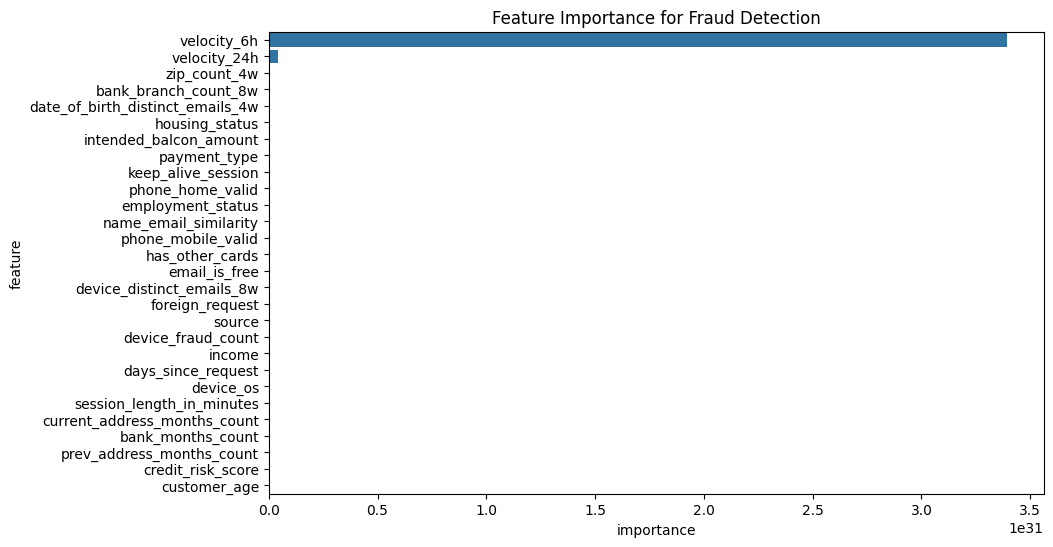

In [56]:
# Feature importance can be approximated by looking at the mean and variance of each feature for each class
featuresImp = pd.DataFrame()

# Initialize data lists
feature = []
importance = []

feature_importance = np.exp(model.theta_[0]) - np.exp(model.theta_[1])
important_features = np.argsort(feature_importance)[::-1]

print("Important features in predicting fraud:")
for i in important_features:
    feature.append(X.columns[i])
    importance.append(feature_importance[i])
    #print(X.columns[i], ":", feature_importance[i])

featuresImp['feature'] = feature
featuresImp['importance'] = importance

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=featuresImp.sort_values(by='importance', ascending=False))
plt.title('Feature Importance for Fraud Detection')

In [57]:
featuresImp

,feature,importance
0,velocity_6h,3.392520e+31
1,velocity_24h,4.177120e+29
2,zip_count_4w,2.521775e+15
3,bank_branch_count_8w,2.118656e+03
4,date_of_birth_distinct_emails_4w,6.819517e+00
5,housing_status,3.859124e+00
6,intended_balcon_amount,2.020074e+00
7,payment_type,7.422138e-01
8,keep_alive_session,6.972264e-01
9,phone_home_valid,3.751529e-01
